# Taxi fare prediction using Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [145]:
data=pd.read_csv(r"F:\Nikhila AIML\TefoLOGIC training\uber.csv")
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [146]:
data.shape

(200000, 9)

In [147]:
data.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
Unnamed: 0           200000 non-null int64
key                  200000 non-null object
fare_amount          200000 non-null float64
pickup_datetime      200000 non-null object
pickup_longitude     200000 non-null float64
pickup_latitude      200000 non-null float64
dropoff_longitude    199999 non-null float64
dropoff_latitude     199999 non-null float64
passenger_count      200000 non-null int64
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [149]:
data.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [150]:
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

# Data cleaning

In [151]:
data['dropoff_longitude'].fillna(data['dropoff_longitude'].mean(),inplace=True)
data['dropoff_latitude'].fillna(data['dropoff_latitude'].mean(),inplace=True)

In [152]:
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [153]:
data['pickup_datetime'] =  pd.to_datetime(data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [154]:
data['Year'] = data['pickup_datetime'].dt.year
data['Month'] = data['pickup_datetime'].dt.month
data['Date'] = data['pickup_datetime'].dt.day
data['Day'] = data['pickup_datetime'].dt.dayofweek
data['Hour'] = data['pickup_datetime'].dt.hour
data['Minute'] = data['pickup_datetime'].dt.minute

In [155]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute
0,24238194,52:06.0,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3,19,52
1,27835199,04:56.0,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4,20,4
2,44984355,45:00.0,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0,21,45
3,25894730,22:21.0,5.3,2009-06-26 08:22:21,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,4,8,22
4,17610152,47:00.0,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,3,17,47


In [156]:
data.dtypes

Unnamed: 0                    int64
key                          object
fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
Year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object

In [157]:
data1=data.drop(['Unnamed: 0','key'],axis=1)

In [158]:
data1.groupby('passenger_count').count()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Year,Month,Date,Day,Hour,Minute
passenger_count,,,,,,,,,,,,
0,709,709,709,709,709,709,709,709,709,709,709,709
1,138425,138425,138425,138425,138425,138425,138425,138425,138425,138425,138425,138425
2,29428,29428,29428,29428,29428,29428,29428,29428,29428,29428,29428,29428
3,8881,8881,8881,8881,8881,8881,8881,8881,8881,8881,8881,8881
4,4276,4276,4276,4276,4276,4276,4276,4276,4276,4276,4276,4276
5,14009,14009,14009,14009,14009,14009,14009,14009,14009,14009,14009,14009
6,4271,4271,4271,4271,4271,4271,4271,4271,4271,4271,4271,4271
208,1,1,1,1,1,1,1,1,1,1,1,1


In [159]:
!pip install haversine

ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3012, in _dep_map
    return self.__dep_map
  File "C:\Anaconda\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2806, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3003, in _parsed_pkg_info
    return self._pkg_info
  File "C:\Anaconda\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2806, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\pip\_internal\commands\install.py", line 524, in _warn_about_conflicts
    

In [160]:
#haversine distance-calculating distance between 2 geolocatons
import haversine as hs

In [161]:
def hav_dist(lat1, lon1, lat2, lon2):
    dLat = np.radians(lat2 - lat1)
    dLon = np.radians(lon2 - lon1)
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)
    
    a = (np.sin(dLat / 2) ** 2 + np.sin(dLon / 2) ** 2 * np.cos(lat1) * np.cos(lat2))
    rad = 6371  # Earth's radius in kilometers
    c = 2 * np.arcsin(np.sqrt(a))
    
    distance = rad * c
    return distance

In [162]:
data1['distance'] = hav_dist(data1['pickup_latitude'],data1['pickup_longitude'],data1['dropoff_latitude'],data1['dropoff_longitude'])

In [167]:
data1['fare_amount'].min()

-52.0

In [168]:
data1['fare_amount'].max()

499.0

In [169]:
data1=data1.drop(data1[data1['fare_amount']<2.5].index, axis=0)
data1=data1.drop(data1[data1['fare_amount']>350].index, axis=0)

In [170]:
data1['distance'].min()

0.0

In [171]:
data1['distance'].max()

16409.239135313182

In [172]:
data1 = data1.drop(data1[data1['distance']== 0].index, axis=0)
data1 = data1.drop(data1[data1['distance'] > 40 ].index, axis=0)
data1 = data1.drop(data1[data1['passenger_count'] > 6 ].index, axis=0)
data1 = data1.drop(data1[data1['passenger_count'] ==0 ].index, axis=0)
data1 = data1.drop(data1[data1['passenger_count'] ==0.12 ].index, axis=0)

In [173]:
data1 = data1.drop(data1[data1['pickup_datetime'].isnull()].index, axis=0)
data1=data1.drop(data1[data1["fare_amount"].isnull()].index, axis=0)

In [174]:
data1 = data1.drop((data1[data1['pickup_latitude']<-90]).index, axis=0)
data1 = data1.drop((data1[data1['pickup_latitude']>90]).index, axis=0)

In [175]:
df=pd.DataFrame(data1[['passenger_count','distance',
       'Year', 'Month', 'Date', 'Day', 'Hour', 'Minute','fare_amount']])

In [176]:
df.shape

(193155, 9)

In [177]:
df.head()

,passenger_count,distance,Year,Month,Date,Day,Hour,Minute,fare_amount
0,1,1.683323,2015,5,7,3,19,52,7.5
1,1,2.457590,2009,7,17,4,20,4,7.7
2,1,5.036377,2009,8,24,0,21,45,12.9
3,3,1.661683,2009,6,26,4,8,22,5.3
4,5,4.475450,2014,8,28,3,17,47,16.0


# Data Visualization

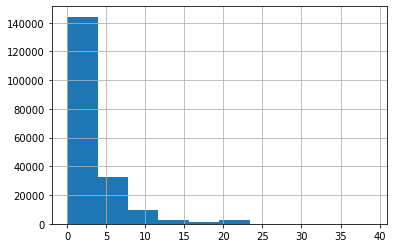

In [178]:
df['distance'].hist()

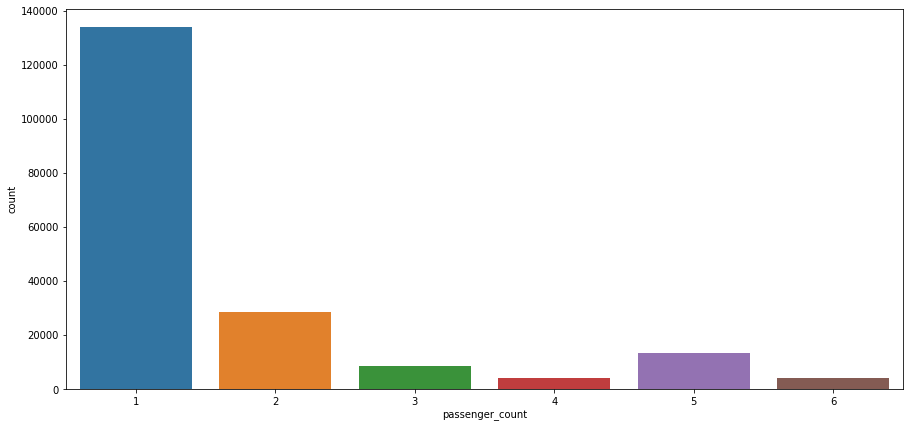

In [179]:
plt.figure(figsize=(15,7))
sns.countplot(x="passenger_count", data=df)

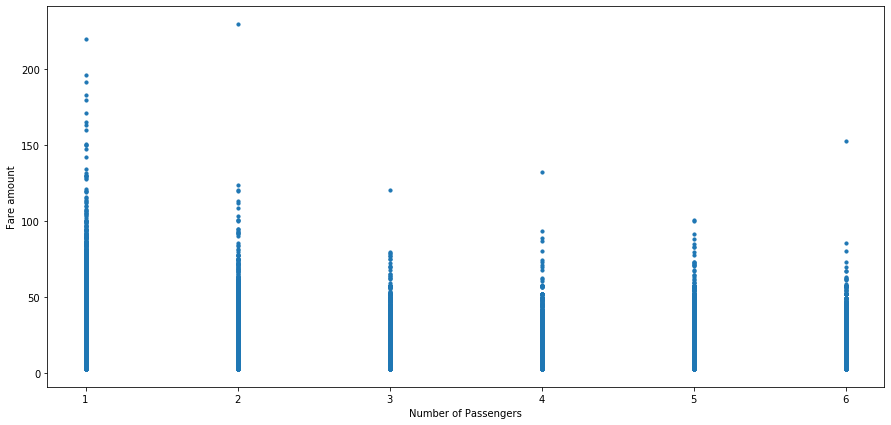

In [180]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['passenger_count'], y=df['fare_amount'], s=10)
plt.xlabel('Number of Passengers')
plt.ylabel('Fare amount')
plt.show()

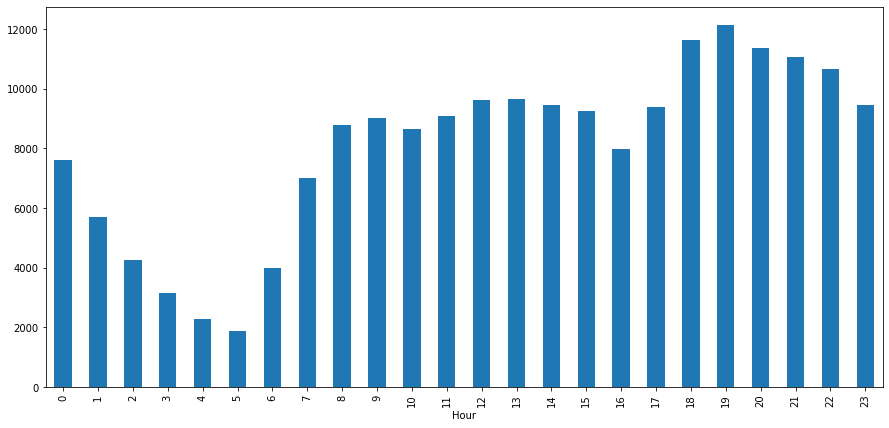

In [181]:
plt.figure(figsize=(15,7))
df.groupby(df['Hour'])['Hour'].count().plot(kind="bar")
plt.show()
#low price at 5 am and highest at 7pm

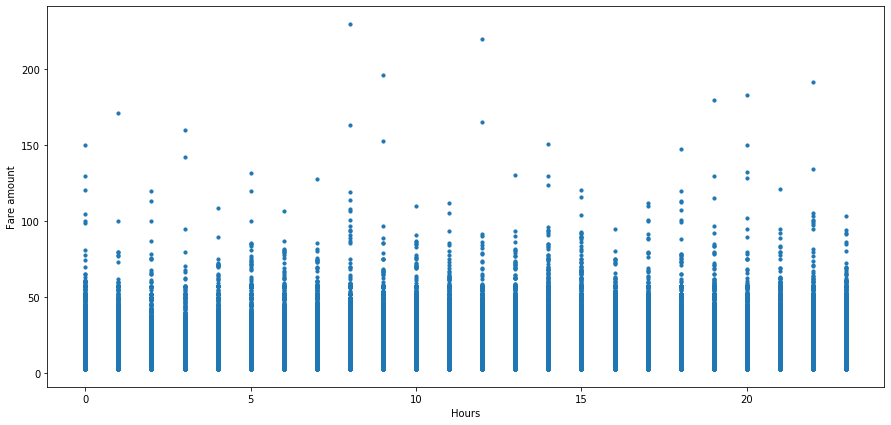

In [182]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['Hour'], y=df['fare_amount'],s=10)
plt.xlabel('Hours')
plt.ylabel('Fare amount')
plt.show()
#costly from 8 am to 11pm

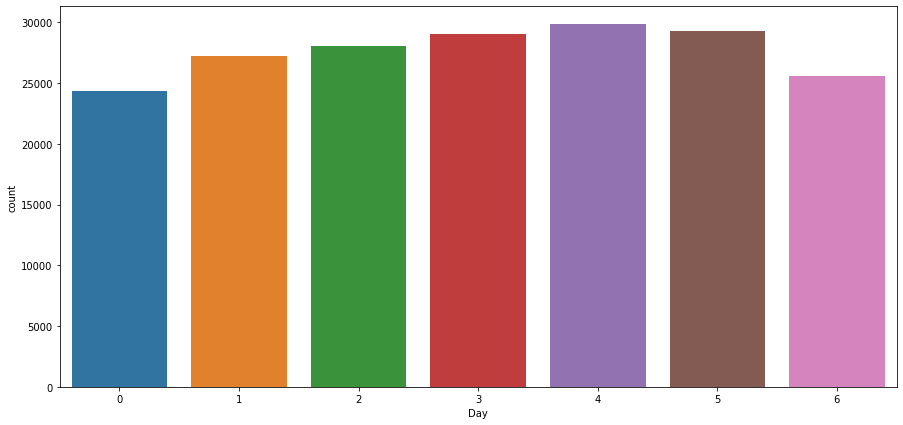

In [183]:
plt.figure(figsize=(15,7))
sns.countplot(x='Day',data=df)
#costlt on 

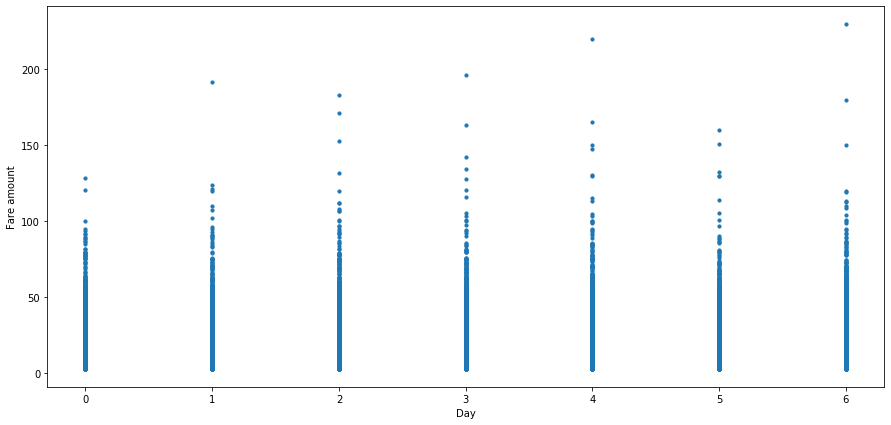

In [184]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['Day'], y=df['fare_amount'],s=10)
plt.xlabel('Day')
plt.ylabel('Fare amount')
plt.show()
#high fare on  saturday and thursday low fare on tuesday

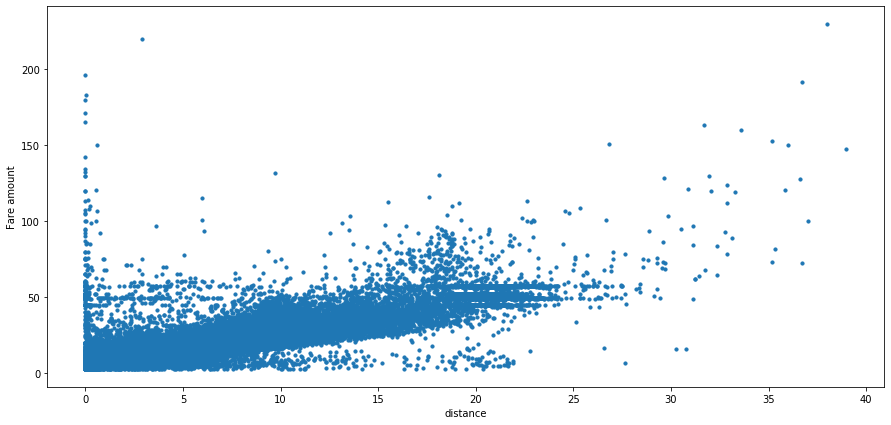

In [185]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['distance'], y=df['fare_amount'],s=10)
plt.xlabel('distance')
plt.ylabel('Fare amount')
plt.show()

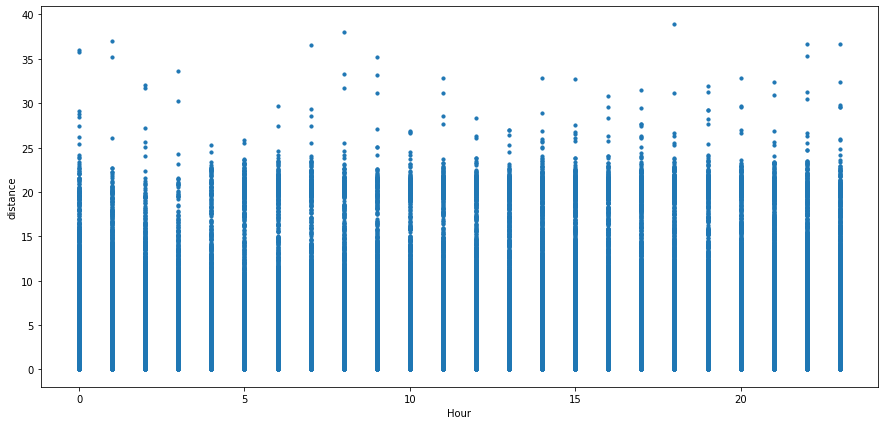

In [186]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['Hour'], y=df['distance'],s=10)
plt.xlabel('Hour')
plt.ylabel('distance')
plt.show()
#7 am to 11pm hours travelling more distance

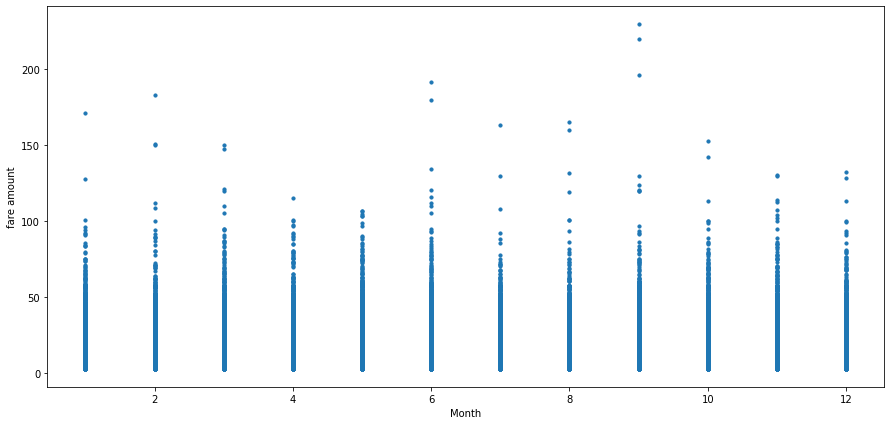

In [187]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['Month'], y=df['fare_amount'],s=10)
plt.xlabel('Month')
plt.ylabel('fare amount')
plt.show()
#fare amount is high in month of june and september

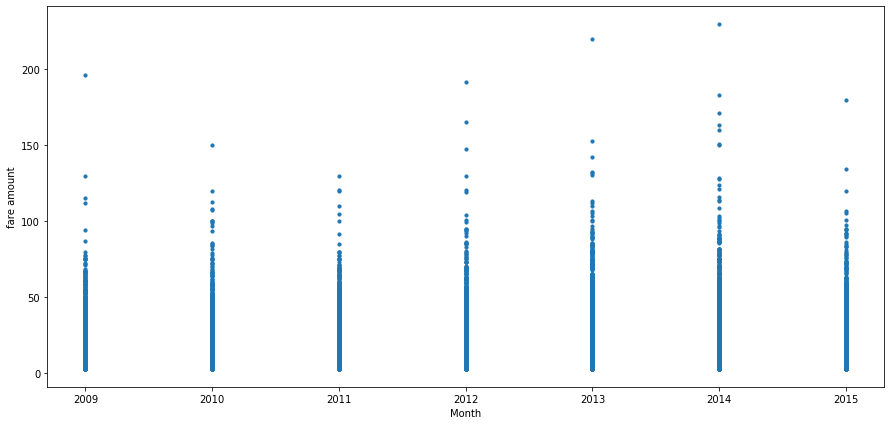

In [188]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['Year'], y=df['fare_amount'],s=10)
plt.xlabel('Month')
plt.ylabel('fare amount')
plt.show()

In [189]:
x=df.drop(['fare_amount'],axis=1)
x.head()

,passenger_count,distance,Year,Month,Date,Day,Hour,Minute
0,1,1.683323,2015,5,7,3,19,52
1,1,2.457590,2009,7,17,4,20,4
2,1,5.036377,2009,8,24,0,21,45
3,3,1.661683,2009,6,26,4,8,22
4,5,4.475450,2014,8,28,3,17,47


In [190]:
y=df['fare_amount']

In [191]:
y.head()

0     7.5
1     7.7
2    12.9
3     5.3
4    16.0
Name: fare_amount, dtype: float64

# Model building- Linear Regression

In [192]:
from sklearn.model_selection import train_test_split

In [193]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [194]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [195]:
x_train.shape

(154524, 8)

In [196]:
y_pred=reg.predict(x_test)

In [197]:
y_pred

array([ 8.01143273, 24.16189596, 11.03728097, ...,  8.32086082,
        6.33217899, 10.90887059])

In [198]:
from sklearn.metrics import r2_score

In [199]:
r2=r2_score(y_test,y_pred)

In [200]:
r2

0.7879908070581784

In [201]:
from sklearn.metrics import mean_squared_error

In [202]:
mean_squared_error(y_pred,y_test)

19.47781868838127

In [203]:
results=pd.DataFrame(columns=['Actual','Predicted'])
results['Actual']=y_test
results['Predicted']=y_pred

In [204]:
results=results.reset_index()
results['id']=results.index
results.head(5)

,index,Actual,Predicted,id
0,37028,6.0,8.011433,0
1,136347,36.3,24.161896,1
2,7203,8.9,11.037281,2
3,46583,11.3,14.359723,3
4,193612,15.7,13.299871,4


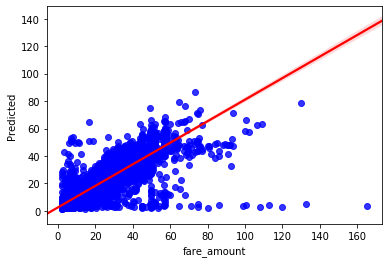

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.scatter(y_pred,x_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.regplot(y_test, y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"}) 

[]

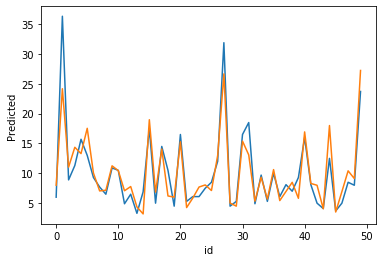

In [206]:
sns.lineplot(x='id',y='Actual',data=results.head(50))
sns.lineplot(x='id',y='Predicted',data=results.head(50))
plt.plot()

In [209]:
x.head()

,passenger_count,distance,Year,Month,Date,Day,Hour,Minute
0,1,1.683323,2015,5,7,3,19,52
1,1,2.457590,2009,7,17,4,20,4
2,1,5.036377,2009,8,24,0,21,45
3,3,1.661683,2009,6,26,4,8,22
4,5,4.475450,2014,8,28,3,17,47


# predicting with new values

In [211]:
new=[[1,2.7845,2020,9,6,6,11,50]]
real=reg.predict(new)
real

array([14.33348929])